<a href="https://colab.research.google.com/github/Kashmira98/DADM-Assignment/blob/main/Copy_of_Listings_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
nyc_listings= pd.read_csv('/gdrive/MyDrive/Practicum/Datasets/Newyork-2021/nyc_listings.csv')
lon_listings= pd.read_csv('/gdrive/MyDrive/Practicum/Datasets/London-2021/lon_listings.csv')
sy_listings= pd.read_csv('/gdrive/MyDrive/Practicum/Datasets/Sydney-2021/sy_listings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
nyc_listings.shape, lon_listings.shape, sy_listings.shape

((38277, 74), (66641, 74), (20880, 74))

In [ ]:
# adding column cities using insert() method
nyc_listings.insert(loc=7, column='Cities', value='New York', allow_duplicates=True)
lon_listings.insert(loc=7, column='Cities', value='London', allow_duplicates=True)
sy_listings.insert(loc=7, column='Cities', value='Sydney', allow_duplicates=True)

In [ ]:
listings = pd.concat([nyc_listings, lon_listings, sy_listings])
listings.shape

(125798, 75)

#Data Understanding

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125798 entries, 0 to 20879
Data columns (total 75 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            125798 non-null  int64  
 1   listing_url                                   125798 non-null  object 
 2   scrape_id                                     125798 non-null  int64  
 3   last_scraped                                  125798 non-null  object 
 4   name                                          125754 non-null  object 
 5   description                                   121508 non-null  object 
 6   neighborhood_overview                         75206 non-null   object 
 7   Cities                                        125798 non-null  object 
 8   picture_url                                   125798 non-null  object 
 9   host_id                                       125

Deleting unwanted columns which are not required for predicting prices

In [ ]:
unwanted_columns = ['id', 
                   'calendar_updated',
                    'host_location',
                   'listing_url', 
                   'scrape_id', 
                   'host_id',
                   'picture_url', 
                   'host_url', 
                   'host_thumbnail_url', 
                   'host_picture_url', 'host_name','license','name', 'last_scraped','availability_90', 'host_listings_count','host_acceptance_rate','host_about','neighbourhood_group_cleansed','neighborhood_overview' ,'bathrooms','review_scores_accuracy','review_scores_rating','host_neighbourhood','neighbourhood','bedrooms','minimum_minimum_nights','review_scores_accuracy', 'maximum_minimum_nights', 'maximum_maximum_nights', 'minimum_maximum_nights', 'availability_30', 'availability_60', 'calendar_last_scraped', 'number_of_reviews_l30d', 'first_review','last_review', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
listings.drop(unwanted_columns, axis=1, inplace=True)


In [ ]:
listings.shape

(125798, 33)

Checking the target column "PRICE"

In [ ]:
listings.price

0        $150.00
1         $75.00
2         $60.00
3        $275.00
4         $68.00
          ...   
20875     $79.00
20876     $80.00
20877    $150.00
20878    $169.00
20879    $254.00
Name: price, Length: 125798, dtype: object

In [ ]:
listings['price'] = listings['price'].replace({r'\$':'', r'\,':''}, regex = True)
listings.price

0        150.00
1         75.00
2         60.00
3        275.00
4         68.00
          ...  
20875     79.00
20876     80.00
20877    150.00
20878    169.00
20879    254.00
Name: price, Length: 125798, dtype: object

In [ ]:
listings['price'] = listings['price'].astype(np.float)
listings.price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


0        150.0
1         75.0
2         60.0
3        275.0
4         68.0
         ...  
20875     79.0
20876     80.0
20877    150.0
20878    169.0
20879    254.0
Name: price, Length: 125798, dtype: float64

Dealing with missing data

In [ ]:
listings.isnull().sum().sort_values(ascending=False)

host_response_rate                              64523
host_response_time                              64523
beds                                             6955
description                                      4290
bathrooms_text                                    375
host_is_superhost                                  96
host_has_profile_pic                               96
host_identity_verified                             96
host_since                                         96
host_total_listings_count                          96
maximum_nights_avg_ntm                             22
minimum_nights_avg_ntm                             22
maximum_nights                                      0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count                      0
instant_bookable                                    0
number_of_reviews_ltm                               0
number_of_reviews           

In [ ]:
missing_percent = listings.isnull().sum(axis =0) /listings.shape[0] *100

missing_percent

description                                      3.410229
Cities                                           0.000000
host_since                                       0.076313
host_response_time                              51.290959
host_response_rate                              51.290959
host_is_superhost                                0.076313
host_total_listings_count                        0.076313
host_verifications                               0.000000
host_has_profile_pic                             0.076313
host_identity_verified                           0.076313
neighbourhood_cleansed                           0.000000
latitude                                         0.000000
longitude                                        0.000000
property_type                                    0.000000
room_type                                        0.000000
accommodates                                     0.000000
bathrooms_text                                   0.298097
beds          

(array([30.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 0.        ,  5.12909585, 10.2581917 , 15.38728756, 20.51638341,
        25.64547926, 30.77457511, 35.90367096, 41.03276682, 46.16186267,
        51.29095852]),
 <a list of 10 Patch objects>)

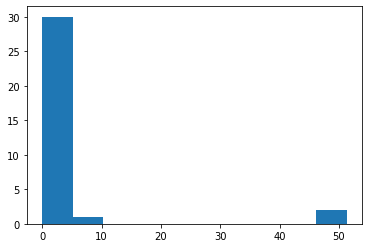

In [ ]:
import matplotlib.pyplot as plt
plt.hist(missing_percent)

From the histogram of number of missing value across columns, I decide to drop all the columns with more than 20% of samples are missing

In [ ]:
# get the list of all columns with more than 20% samples has missing value 
col_drop = missing_percent[missing_percent > 20].index
col_drop

Index(['host_response_time', 'host_response_rate'], dtype='object')

In [ ]:
# drop those columns 
listings = listings.drop(col_drop, axis =1 )

In [ ]:
# look at the data with few missing value 
few_missing_col = missing_percent[(missing_percent>0) & (missing_percent <0.2)].index.tolist()
few_missing_col 

#listings[few_missing_col]

['host_since',
 'host_is_superhost',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm']

In [ ]:
listings.isnull().sum().sort_values(ascending=False)

beds                                            6955
description                                     4290
bathrooms_text                                   375
host_since                                        96
host_total_listings_count                         96
host_has_profile_pic                              96
host_identity_verified                            96
host_is_superhost                                 96
maximum_nights_avg_ntm                            22
minimum_nights_avg_ntm                            22
maximum_nights                                     0
number_of_reviews_ltm                              0
number_of_reviews                                  0
availability_365                                   0
calculated_host_listings_count                     0
has_availability                                   0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
instant_bookable                              

In [ ]:
listings.dtypes

description                                      object
Cities                                           object
host_since                                       object
host_is_superhost                                object
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
beds                                            float64
amenities                                        object
price                                           

Do Imputation for missing value
For those numeric columns, I will do imputation the missing value with the mean.

For those categorical columns I will do imputation the missing value with the mode.

In [ ]:
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy = 'mean')

numeric_col = ['beds', 'host_total_listings_count','minimum_nights_avg_ntm','maximum_nights_avg_ntm']
 
data = imputer1.fit_transform(listings[numeric_col])

listings[numeric_col] = pd.DataFrame(data, columns = numeric_col)

listings[numeric_col].head()


,beds,host_total_listings_count,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,1.0,8.0,30.0,1125.0
1,3.0,1.0,1.0,730.0
2,1.0,1.0,30.0,730.0
3,2.0,1.0,5.0,1125.0
4,1.0,1.0,2.0,14.0


In [ ]:
# look at the categorical data 
categorical_col = ['host_is_superhost','host_identity_verified', 'host_has_profile_pic', 'bathrooms_text']

listings[categorical_col].head()

,host_is_superhost,host_identity_verified,host_has_profile_pic,bathrooms_text
0,f,t,t,1 bath
1,f,t,t,1 bath
2,f,t,t,NaN
3,f,t,t,1.5 baths
4,f,f,t,1 bath


In [ ]:
# Label encode 'host_is_superhost', 'host_identity_verified', 'host_has-profile_pic'

listings['host_identity_verified'] = listings['host_identity_verified'].map({'t':1, 'f':0})
listings['host_is_superhost'] = listings['host_is_superhost'].map({'t':1, 'f':0})
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].map({'t':1, 'f':0})


In [ ]:
listings['host_identity_verified'] = listings['host_identity_verified'].astype(float)
listings['host_is_superhost'] = listings['host_is_superhost'].astype(float)
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].astype(float)

In [ ]:
(listings[categorical_col])

,host_is_superhost,host_identity_verified,host_has_profile_pic,bathrooms_text
0,0.0,1.0,1.0,1 bath
1,0.0,1.0,1.0,1 bath
2,0.0,1.0,1.0,NaN
3,0.0,1.0,1.0,1.5 baths
4,0.0,0.0,1.0,1 bath
...,...,...,...,...
20875,0.0,1.0,1.0,1 private bath
20876,0.0,1.0,1.0,NaN
20877,0.0,1.0,1.0,1 bath
20878,0.0,1.0,1.0,2 baths


Bathroom_text

In [ ]:
listings.bathrooms_text

0                1 bath
1                1 bath
2                   NaN
3             1.5 baths
4                1 bath
              ...      
20875    1 private bath
20876               NaN
20877            1 bath
20878           2 baths
20879         1.5 baths
Name: bathrooms_text, Length: 125798, dtype: object

In [ ]:
#extracted bath numbers from bathrooms_text 
listings["bath"] = listings["bathrooms_text"].str.extract("(\d*\.?\d+)", expand=True)

In [ ]:
#drop bathroom_text
listings = listings.drop(columns=['bathrooms_text'])

In [ ]:
#converting bath from integer to float
listings['bath'] = listings['bath'].astype(float)

In [ ]:
listings.bath

0        1.0
1        1.0
2        NaN
3        1.5
4        1.0
        ... 
20875    1.0
20876    NaN
20877    1.0
20878    2.0
20879    1.5
Name: bath, Length: 125798, dtype: float64

In [ ]:
listings.isnull().sum()

description                                     4290
Cities                                             0
host_since                                        96
host_is_superhost                                 96
host_total_listings_count                          0
host_verifications                                 0
host_has_profile_pic                              96
host_identity_verified                            96
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
beds                                               0
amenities                                          0
price                                              0
minimum_nights                                     0
maximum_nights                                

In [ ]:
categorical_col = ['host_is_superhost','host_identity_verified', 'host_has_profile_pic', 'bath']

listings[categorical_col].head()

,host_is_superhost,host_identity_verified,host_has_profile_pic,bath
0,0.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0
2,0.0,1.0,1.0,NaN
3,0.0,1.0,1.0,1.5
4,0.0,0.0,1.0,1.0


In [ ]:
# initiate the imputer 

imputer2 = SimpleImputer(strategy = 'most_frequent')

data = imputer2.fit_transform(listings[categorical_col])

# transform the array back to DataFrame 

listings[categorical_col] = pd.DataFrame(data, columns = categorical_col)

In [ ]:
listings.isnull().sum().sort_values(ascending=False)

description                                     4290
host_since                                        96
price                                              0
calculated_host_listings_count_shared_rooms        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count                     0
instant_bookable                                   0
number_of_reviews_ltm                              0
number_of_reviews                                  0
availability_365                                   0
has_availability                                   0
maximum_nights_avg_ntm                             0
minimum_nights_avg_ntm                             0
maximum_nights                                     0
minimum_nights                                     0
amenities                                          0
Cities                                             0
beds                                          

#Creating new dataframe from description, host_since, amenities and price

In [ ]:
description = listings[['description','host_since','amenities', 'host_verifications', 'price']].copy()      # Extract selected columns
print(description)    

                                             description  host_since  \
0      Beautiful, spacious skylit studio in the heart...  2008-09-09   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...  2008-12-07   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...  2009-02-03   
3      We welcome you to stay in our lovely 2 br dupl...  2009-02-03   
4      Please don’t expect the luxury here just a bas...  2009-03-03   
...                                                  ...         ...   
20875          <b>License number</b><br />PID-STRA-25452  2018-03-11   
20876          <b>License number</b><br />PID-STRA-25452  2018-03-11   
20877  This modern 1 bedroom 1 bathroom apartment is ...  2021-06-08   
20878  This beautiful townhouse style split-level apa...  2016-11-06   
20879  Close to the Pacific Highway, only 700m walk t...  2021-06-23   

                                               amenities  \
0      ["Extra pillows and blankets", "Baking sheet",...   
1      ["Extra 

In [ ]:
listings = listings.drop(columns=['description', 'host_since','host_verifications', 'amenities'])

In [ ]:
#listings.bathrooms_text

In [ ]:
#extracted bath numbers from bathrooms_text 
#listings["bath"] = listings["bathrooms_text"].str.extract("(\d*\.?\d+)", expand=True)

In [ ]:
#drop bathroom_text
#listings = listings.drop(columns=['bathrooms_text'])

In [ ]:
#listings.bath

In [ ]:
#converting bath from integer to float
#listings['bath'] = listings['bath'].astype(float)

In [ ]:
#listings.bath

In [ ]:
#listings.isnull().sum()

Encoding for categorical variables

In [ ]:
df_num = listings.select_dtypes(exclude=[np.number])
df_num

,Cities,neighbourhood_cleansed,property_type,room_type,has_availability,instant_bookable
0,New York,Midtown,Entire rental unit,Entire home/apt,t,f
1,New York,Bedford-Stuyvesant,Entire guest suite,Entire home/apt,t,f
2,New York,Bedford-Stuyvesant,Private room in rental unit,Private room,t,f
3,New York,Sunset Park,Entire rental unit,Entire home/apt,t,f
4,New York,Midtown,Private room in rental unit,Private room,t,f
...,...,...,...,...,...,...
20875,Sydney,Botany Bay,Private room in residential home,Private room,t,t
20876,Sydney,Botany Bay,Private room in residential home,Private room,t,t
20877,Sydney,Ryde,Entire rental unit,Entire home/apt,t,f
20878,Sydney,Botany Bay,Entire rental unit,Entire home/apt,t,f


In [ ]:
#Encoding cities 
Cities_dict = {'New York': 1, 'London': 2, 'Sydney': 3}
listings.Cities.replace(Cities_dict, inplace=True)

In [ ]:
listings.dtypes

Cities                                            int64
host_is_superhost                               float64
host_total_listings_count                       float64
host_has_profile_pic                            float64
host_identity_verified                          float64
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
beds                                            float64
price                                           float64
minimum_nights                                    int64
maximum_nights                                    int64
minimum_nights_avg_ntm                          float64
maximum_nights_avg_ntm                          float64
has_availability                                

In [ ]:
# Encode binary outcomes 
binary_cols=['instant_bookable','has_availability']
for col in binary_cols:
    listings[col]  = listings[col].map({'t': 1, 'f': 0 })

# Encode multi-categorical outcomes 
multi_cols=['neighbourhood_cleansed','property_type','room_type']
listings =pd.get_dummies(data=listings, columns=multi_cols,drop_first=True)

In [ ]:
#converting categorical column from object to float
#listings['host_identity_verified'] = listings['host_identity_verified'].astype(float)
#listings['host_is_superhost'] = listings['host_is_superhost'].astype(float)
#listings['host_has_profile_pic'] = listings['host_has_profile_pic'].astype(float)
#listings['instant_bookable'] = listings['instant_bookable'].astype(float)
#listings['has_availability'] = listings['has_availability'].astype(float)

In [ ]:
listings

,Cities,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,beds,price,...,property_type_Shared room in villa,property_type_Tent,property_type_Tiny house,property_type_Tower,property_type_Train,property_type_Treehouse,property_type_Yurt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,0.0,8.0,1.0,1.0,40.753560,-73.985590,1,1.0,150.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,1.0,1.0,1.0,40.684940,-73.957650,3,3.0,75.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,1.0,1.0,1.0,40.685350,-73.955120,2,1.0,60.0,...,0,0,0,0,0,0,0,0,1,0
3,1,0.0,1.0,1.0,1.0,40.662650,-73.994540,4,2.0,275.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,1.0,1.0,0.0,40.764570,-73.983170,2,1.0,68.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20875,3,0.0,13.0,1.0,0.0,-33.930222,151.190360,2,1.0,79.0,...,0,0,0,0,0,0,0,0,1,0
20876,3,0.0,7.0,1.0,1.0,-33.929359,151.187843,2,1.0,80.0,...,0,0,0,0,0,0,0,0,1,0
20877,3,0.0,7.0,1.0,1.0,-33.781406,151.111693,2,1.0,150.0,...,0,0,0,0,0,0,0,0,0,0
20878,3,0.0,7.0,1.0,1.0,-33.921565,151.191030,4,1.0,169.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
listings.dtypes

Cities                         int64
host_is_superhost            float64
host_total_listings_count    float64
host_has_profile_pic         float64
host_identity_verified       float64
                              ...   
property_type_Treehouse        uint8
property_type_Yurt             uint8
room_type_Hotel room           uint8
room_type_Private room         uint8
room_type_Shared room          uint8
Length: 435, dtype: object

#Modelling

In [ ]:
y = listings['price']

X = listings.drop(['price'], axis = 1 )

In [ ]:
# split data to train and test data set 
from sklearn.model_selection import train_test_split

X_train, X_test,  y_train, y_test = train_test_split(X, y)

In [ ]:
# create a function for evaluate a model with prediction time 

from sklearn.metrics import mean_squared_error, r2_score
from time import time

def train_predict(learner, X_train, y_train, X_test, y_test): 
    """
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: review_scores_rating training set
       - X_test: features testing set
       - y_test: review_scores_rating testing set
    """
    results = {}
    
    #Fit the learner to the training data a
    learner = learner.fit(X_train, y_train)
    
    
    # Get predictions on the test set(X_test), 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    
    #Compute score on the training samples
    results['mse_train'] = mean_squared_error(y_train, predictions_train)
    results['r2_train'] = r2_score(y_train, predictions_train)
    
    #Compute accuracy on test set
    results['mse_test'] = mean_squared_error(y_test,predictions_test)
    results['r2_test'] = r2_score(y_test,predictions_test)
    
    print("MSE_train: %.4f" % results['mse_train'])
    print("MSE_test: %.4f" % results['mse_test'])
    print("R2_train:%.4f" % learner.score(X_train,y_train))
    print("R2_test:%.4f" % learner.score(X_test,y_test))
    return results

In [ ]:
#Initialize two different models

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso 

#clf1 = KNeighborsRegressor()
clf2 = RandomForestRegressor(random_state = 42)
clf3 = Lasso(random_state = 2 )
#clf4 = AdaBoostRegressor(random_state =42)


# Collect results on the learners
results = {}
for clf in [ clf2, clf3]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf,  X_train, y_train, X_test, y_test)

MSE_train: 12307.6511
MSE_test: 74114.2743
R2_train:0.9112
R2_test:0.4188


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.721e+09, tolerance: 1.308e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


MSE_train: 120019.1459
MSE_test: 111002.0989
R2_train:0.1344
R2_test:0.1295


In [ ]:
# Visualize the the result from four different models

def evaluate(results):
    """
    Visualization code to display results of various learners.
    inputs:
        results: a dictionary of individual learners, each learner is a dictionary of different metric  
    """
    # Create figure
    fig, ax = plt.subplots(2, 2, figsize = (12,7))
    fig.tight_layout()

    learners = results.keys()
    mdict = {'RandomForestRegressor': 'RF',  'Lasso': 'Lasso'}
    learners = [mdict[key] for key in learners]
     
    #  loop to plot four panels of data
    for j, metric in enumerate([ 'mse_train', 'r2_train', 'mse_test', 'r2_test']):
        y = []
        for  k, learner in enumerate(results.keys()):
            y.append( results[learner][metric])
            
        ax[j//2, j%2].bar(learners, y,   align='center', alpha=0.5)
        ax[j//2, j%2].set_title(metric)
        
    plt.show()

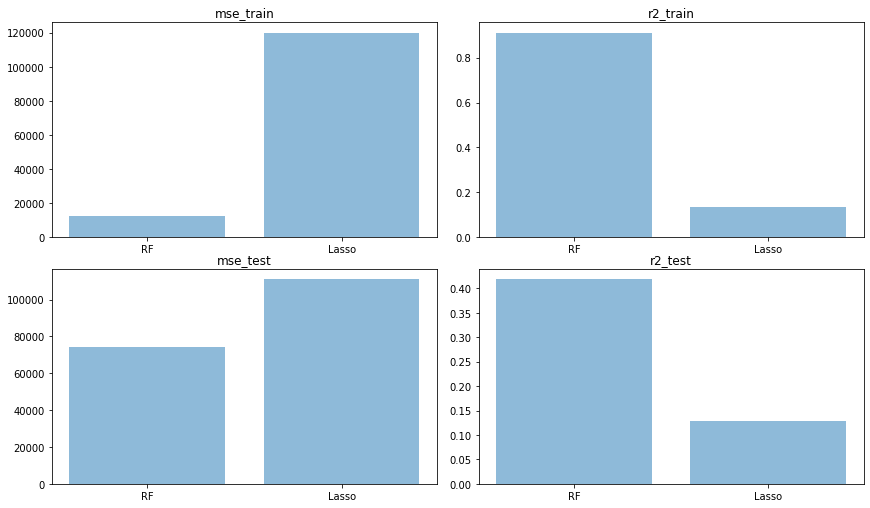

In [ ]:
# show the results core graph 
evaluate(results)

In [ ]:
print(results['RandomForestRegressor'])
print(results['Lasso'])

{'mse_train': 12307.651066876972, 'r2_train': 0.9112369131009173, 'mse_test': 74114.27433970428, 'r2_test': 0.41875415038991437}
{'mse_train': 120019.14589173761, 'r2_train': 0.13441892214407525, 'mse_test': 111002.09887267997, 'r2_test': 0.1294590705694949}


In [ ]:
# TODO: Import a supervised learning model that has 'feature_importances_'
#Random Forest Classifier model has the feature_importances attribute 

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
importances

array([3.65580331e-04, 1.05603088e-02, 2.34261661e-02, 3.63024408e-04,
       7.77469136e-03, 7.79803920e-02, 1.33746660e-01, 1.01950673e-01,
       2.44855150e-02, 3.75418063e-02, 3.05012329e-02, 5.03997402e-02,
       2.38314043e-02, 3.81958918e-03, 9.26992225e-02, 2.93416533e-02,
       8.91839825e-03, 4.76212512e-03, 4.12220985e-02, 5.15394760e-02,
       2.48815400e-02, 4.92234214e-04, 1.56601149e-02, 2.36673660e-08,
       2.10731460e-06, 6.14185593e-05, 4.85352724e-06, 1.60675185e-05,
       9.16448772e-05, 1.19344924e-05, 1.30978771e-05, 1.49739610e-04,
       5.33075747e-08, 1.64177698e-04, 7.99084304e-05, 9.57167724e-08,
       2.45748777e-05, 2.36340169e-06, 1.37170520e-07, 4.25122084e-04,
       2.07248613e-06, 8.32119323e-07, 1.78139226e-06, 7.08747140e-07,
       8.56059868e-07, 6.26015552e-05, 2.78445480e-05, 2.79984055e-05,
       1.33038434e-06, 1.84588196e-05, 1.03366837e-06, 6.86044702e-04,
       1.24492812e-03, 1.09808270e-05, 2.74958180e-05, 4.57643445e-08,
      

In [ ]:
# Create a function for feature plot 
def feature_plot(importances, X_train, y_train):
    
    # Display the most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (12,5))
    plt.title("Normalized Weights for First five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.5, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

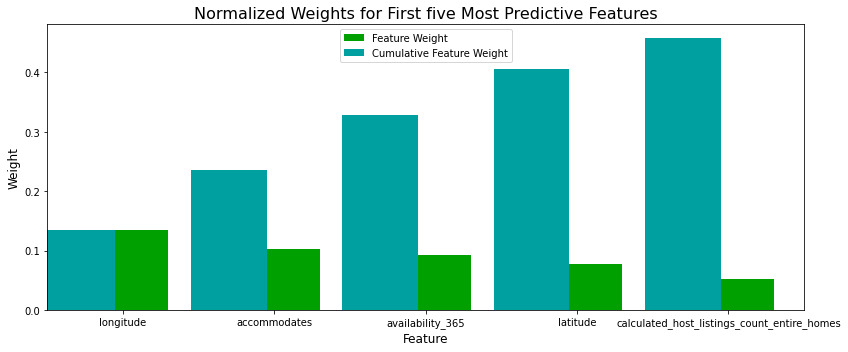

In [ ]:
# plot the top five feature importance with feature weight 

feature_plot(importances, X_train, y_train)

RANDOM FOREST REGRESSOR

In [ ]:
y = listings['price']

X = listings.drop(['price'], axis = 1 )

In [ ]:
# split data to train and test data set 
from sklearn.model_selection import train_test_split

X_train, X_test,  y_train, y_test = train_test_split(X, y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


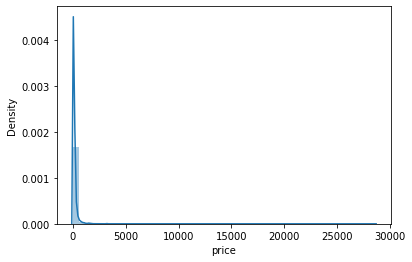

In [ ]:
# Look at the price data distribution 
import seaborn as sns
sns.distplot(listings['price'])

In [ ]:
from sklearn import set_config 
set_config(print_changed_only=False) 
 
rfr = RandomForestRegressor()
print(rfr)
 
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None,
                      min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:

rfr.fit(X_train, y_train)

score = rfr.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.9132907638864811


In [ ]:
ypred = rfr.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  60441.512271169246
RMSE:  30220.756135584623


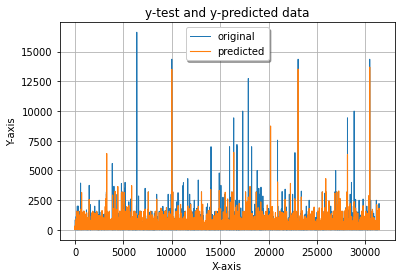

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 